In [ ]:
import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
def get_model(layer='fc2'):
    base_model = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    return model

In [ ]:
def get_files(path_to_files, size):
    fn_imgs = {}
    files = os.listdir(path_to_files)

    for file in files:
        file_path = os.path.join(path_to_files, file)  # Correctly join path and file name
        img = cv2.imread(file_path)  # Read the image

        if img is None:  # Check if the image was loaded correctly
            print(f"Warning: Unable to load image {file}. Skipping.")
            continue

        resized_img = cv2.resize(img, size)  # Resize the image
        fn_imgs[file] = resized_img  # Store the resized image in the dictionary

    return fn_imgs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
def feature_vector(img_arr, model):
    if img_arr.shape[2] == 1:
        img_arr = img_arr.repeat(3, axis=2)
    arr4d = np.expand_dims(img_arr, axis=0)
    arr4d_pp = preprocess_input(arr4d)
    return model.predict(arr4d_pp)[0, :]

In [ ]:
def feature_vectors(imgs_dict, model):
    f_vect = {}
    for fn, img in imgs_dict.items():
        f_vect[fn] = feature_vector(img, model)
    return f_vect

In [ ]:
def separate(y_kmeans, file_names):
    n_clusters = 2
    cluster_path = '/content/drive/MyDrive/AIFA/Results'
    path_to_files = '/content/drive/MyDrive/AIFA/casting_512x512/images'
    if (not os.path.exists(cluster_path)):
        os.mkdir(cluster_path)
    for c in range(0, n_clusters):
        if not os.path.exists(cluster_path + 'cluster_' + str(c)):
            os.mkdir(cluster_path + 'cluster_' + str(c))
    for fn, cluster in zip(file_names, y_kmeans):
        image = cv2.imread(os.path.join(path_to_files, fn))
        cv2.imwrite(cluster_path + 'cluster_' + str(cluster) + '/' + fn, image)

In [ ]:
imgs_dict = get_files(path_to_files = '/content/drive/MyDrive/AIFA/casting_512x512/images',size = (224, 224))

# Create Keras NN model.
model = get_model()

# Feed images through the model and extract feature vectors.
img_feature_vector = feature_vectors(imgs_dict, model)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

In [ ]:
images = list(img_feature_vector.values())

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)
file_names = list(imgs_dict.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
separate(y_kmeans, file_names)

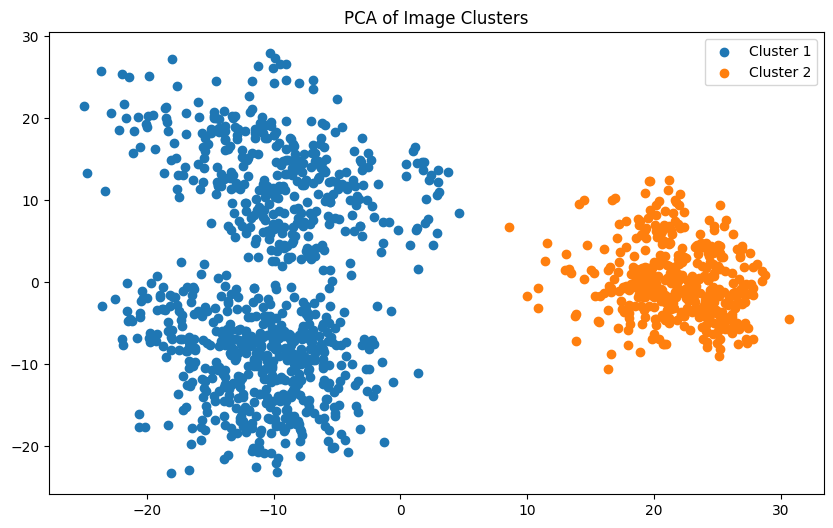

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(features, labels, n_clusters=2):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features)

    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_points = pca_result[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}")

    plt.title('PCA of Image Clusters')
    plt.legend()
    plt.show()

# Assuming `features` are the extracted features and `labels` are the cluster labels
plot_pca(images, y_kmeans, n_clusters=2)


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(images, y_kmeans)

In [ ]:
silhouette_avg

0.21419048

In [ ]:
inertia = kmeans.inertia_
inertia

1119470.186175641

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(images, y_kmeans)


In [ ]:
db_index

1.7475379368231583